<a href="https://colab.research.google.com/github/gantir/eva4/blob/develop/s8/s8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
!pip install git+https://github.com/gantir/evalib.git@develop

In [3]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive/')
except:
  print('May be not using Google Colab')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
from __future__ import print_function
import sys
from argparse import Namespace

import torch
import torchvision
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
from matplotlib.pyplot import imshow
import evalib

In [0]:
def configure_optimizers(params, conf):
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(params, lr=conf.lr, momentum=0.9) # , weight_decay=conf.l2_decay
  scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
  return criterion, optimizer, scheduler

In [0]:
config = Namespace(
    batch_size = 64,
    batch_size_cuda = 64,
    num_workers = 4,
    SEED = 170,
    EPOCHS = 20,
    dropout = 0.0,
    lr = 1e-3,
    l1_decay =  0,
    l2_decay = 1e-4   
)
evalib.utils.init_seed(config.SEED)

In [6]:
data = evalib.data.cifar.CIFAR(config)

Extracting ./data/cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   dog truck  bird


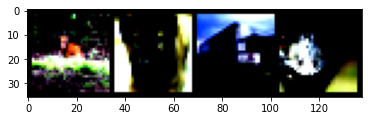

In [7]:
data_iter = iter(data.test_loader)
images, labels = data_iter.next()
index_start, index_end = 32,36
evalib.plot.imshow_torch(torchvision.utils.make_grid(images[index_start:index_end]))
print(' '.join('%5s' % data.classes[label] for label in labels[index_start:index_end]))

# imshow(transforms.ToPILImage()(images[32]))

In [8]:
net = evalib.models.resnet.ResNet18(config.dropout)
model = net.to(evalib.utils.get_device())
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
criterion, optimizer, scheduler = configure_optimizers(model.parameters(), config)

In [10]:
[(train_acc, train_loss), (val_acc, val_loss)] = evalib.tnt.train_n_test(model, criterion, optimizer, scheduler, data.train_loader, data.test_loader, num_epochs=config.EPOCHS)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1


Batch Id/Size: 782/50000, Training Loss: 1.86034894, Training Accuracy: 44.9400%: 100%|██████████| 782/782 [00:33<00:00, 23.02it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.01796794, Test Accuracy: 59.5000%

Epoch: 2


Batch Id/Size: 782/50000, Training Loss: 1.36627829, Training Accuracy: 62.5200%: 100%|██████████| 782/782 [00:33<00:00, 23.12it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.01425286, Test Accuracy: 67.7300%

Epoch: 3


Batch Id/Size: 782/50000, Training Loss: 0.93258286, Training Accuracy: 70.5100%: 100%|██████████| 782/782 [00:33<00:00, 23.30it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.01176495, Test Accuracy: 74.0400%

Epoch: 4


Batch Id/Size: 782/50000, Training Loss: 0.88620764, Training Accuracy: 75.5160%: 100%|██████████| 782/782 [00:33<00:00, 23.32it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00981071, Test Accuracy: 78.6900%

Epoch: 5


Batch Id/Size: 782/50000, Training Loss: 0.98571408, Training Accuracy: 78.5800%: 100%|██████████| 782/782 [00:33<00:00, 23.58it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00944273, Test Accuracy: 79.7100%

Epoch: 6


Batch Id/Size: 782/50000, Training Loss: 0.91361731, Training Accuracy: 80.9600%: 100%|██████████| 782/782 [00:33<00:00, 23.51it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00884416, Test Accuracy: 80.9500%

Epoch: 7


Batch Id/Size: 782/50000, Training Loss: 0.74368232, Training Accuracy: 82.7700%: 100%|██████████| 782/782 [00:33<00:00, 23.53it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00832803, Test Accuracy: 82.0300%

Epoch: 8


Batch Id/Size: 782/50000, Training Loss: 0.60699546, Training Accuracy: 84.1180%: 100%|██████████| 782/782 [00:33<00:00, 23.41it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00800765, Test Accuracy: 83.2100%

Epoch: 9


Batch Id/Size: 782/50000, Training Loss: 0.48458850, Training Accuracy: 85.5880%: 100%|██████████| 782/782 [00:33<00:00, 23.32it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00755349, Test Accuracy: 84.1900%

Epoch: 10


Batch Id/Size: 782/50000, Training Loss: 0.27402481, Training Accuracy: 86.4480%: 100%|██████████| 782/782 [00:33<00:00, 23.28it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.001]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00728424, Test Accuracy: 84.8600%

Epoch: 11


Batch Id/Size: 782/50000, Training Loss: 0.28077310, Training Accuracy: 89.2220%: 100%|██████████| 782/782 [00:33<00:00, 23.46it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.00025]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00641463, Test Accuracy: 86.6400%

Epoch: 12


Batch Id/Size: 782/50000, Training Loss: 0.31868249, Training Accuracy: 90.0680%: 100%|██████████| 782/782 [00:33<00:00, 23.57it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00635253, Test Accuracy: 87.0300%

Epoch: 13


Batch Id/Size: 782/50000, Training Loss: 0.15509950, Training Accuracy: 90.3180%: 100%|██████████| 782/782 [00:33<00:00, 23.59it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00619025, Test Accuracy: 87.2900%

Epoch: 14


Batch Id/Size: 782/50000, Training Loss: 0.09341887, Training Accuracy: 90.8480%: 100%|██████████| 782/782 [00:33<00:00, 23.65it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00621973, Test Accuracy: 87.5300%

Epoch: 15


Batch Id/Size: 782/50000, Training Loss: 0.18377373, Training Accuracy: 91.3920%: 100%|██████████| 782/782 [00:32<00:00, 23.78it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00632424, Test Accuracy: 87.1800%

Epoch: 16


Batch Id/Size: 782/50000, Training Loss: 0.08602229, Training Accuracy: 91.7620%: 100%|██████████| 782/782 [00:32<00:00, 23.83it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00609178, Test Accuracy: 87.5300%

Epoch: 17


Batch Id/Size: 782/50000, Training Loss: 0.14529699, Training Accuracy: 92.2280%: 100%|██████████| 782/782 [00:32<00:00, 23.76it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00609921, Test Accuracy: 87.8500%

Epoch: 18


Batch Id/Size: 782/50000, Training Loss: 0.07565978, Training Accuracy: 92.8000%: 100%|██████████| 782/782 [00:32<00:00, 23.77it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00612490, Test Accuracy: 87.6600%

Epoch: 19


Batch Id/Size: 782/50000, Training Loss: 0.12831780, Training Accuracy: 92.8520%: 100%|██████████| 782/782 [00:33<00:00, 23.69it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


  0%|          | 0/782 [00:00<?, ?it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00612850, Test Accuracy: 87.9300%

Epoch: 20


Batch Id/Size: 782/50000, Training Loss: 0.14866513, Training Accuracy: 93.1800%: 100%|██████████| 782/782 [00:33<00:00, 23.66it/s]
  0%|          | 0/157 [00:00<?, ?it/s]

LR: [0.0005]


100%|██████████| 157/157 [00:03<00:00, 46.74it/s]


Batch Id/Size: 157/10000, Test Loss: 0.00634952, Test Accuracy: 87.9800%



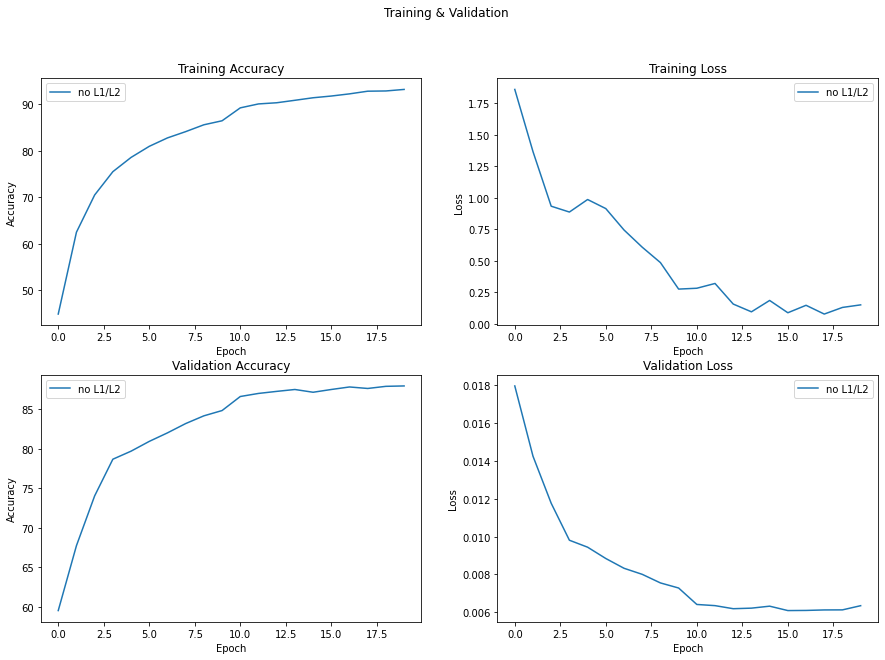

In [11]:
evalib.plot.plot_acc_loss(
    {'no L1/L2': train_acc},
    {'no L1/L2': val_acc},
    {'no L1/L2': train_loss},
    {'no L1/L2': val_loss}
)